# Importing libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load the dataset

In [77]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Condition_Monitoring_of_Hydraulic_System.csv")

# Features and target variables

In [78]:
X = df[['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'FS1', 'TS1', 'TS2', 'TS3', 'TS4', 'CE', 'CP', 'SE']]
y = df[['y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc']]

# Train-test split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function with Classification Report, Confusion Matrix, ROC Curve

In [81]:
# evaluate_classifier function
def evaluate_classifier(y_true, y_pred, classifier_name):
    print(f"Evaluating {classifier_name}...\n")
    print(f"Classification Report for {classifier_name}:\n")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Heatmap for Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_true),
        yticklabels=np.unique(y_true),
    )
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve for each class in a multi-class setting
    n_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Binarize the true labels and predicted labels for the current class
        y_true_binary = label_binarize(y_true, classes=np.unique(y_true))
        y_pred_binary = label_binarize(y_pred, classes=np.unique(y_true))

        fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_binary[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['darkorange', 'green', 'blue', 'purple'][:n_classes]  # Add more colors if needed
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("-" * 50)

# Loop through classifiers, y values, and Train the classifier on the specific y value followed by Make predictions and Evaluate and display results using the function

Evaluating Logistic Regression for all y values...

Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


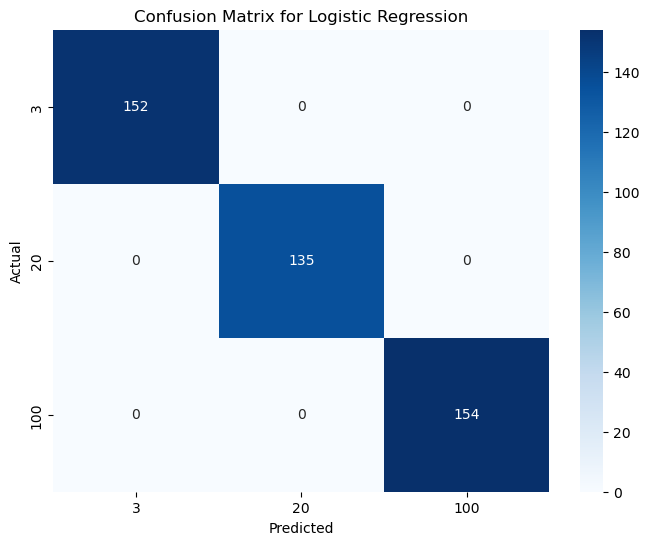

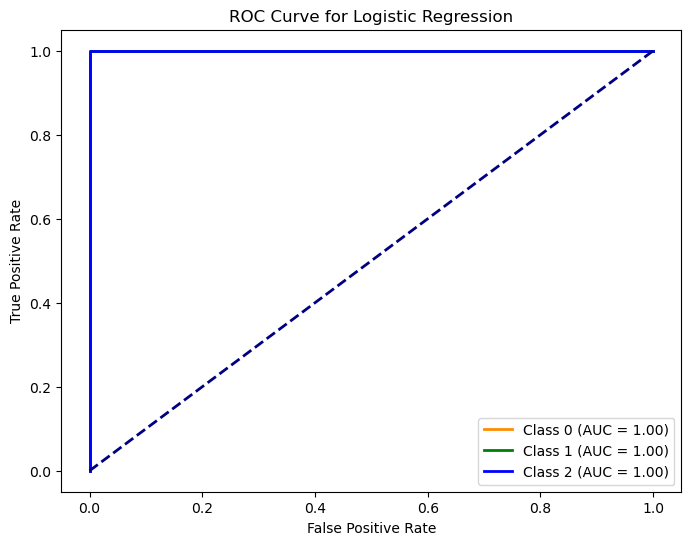

--------------------------------------------------
Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          73       0.00      0.00      0.00        88
          80       1.00      0.01      0.03        67
          90       0.00      0.00      0.00        80
         100       0.47      1.00      0.64       206

    accuracy                           0.47       441
   macro avg       0.37      0.25      0.17       441
weighted avg       0.37      0.47      0.30       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


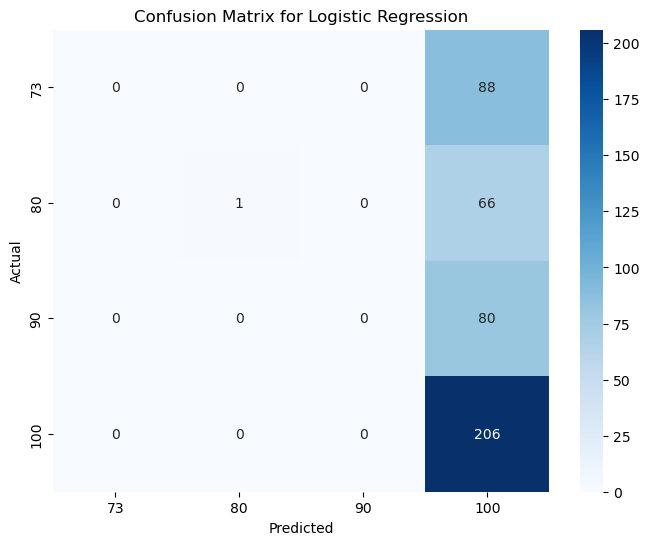

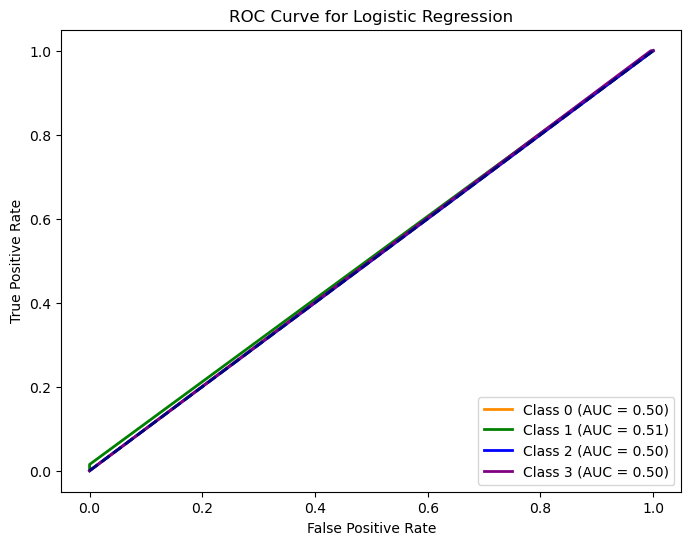

--------------------------------------------------
Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.69      0.99      0.81       228
           1       0.86      0.06      0.11       101
           2       0.70      0.67      0.68       112

    accuracy                           0.69       441
   macro avg       0.75      0.57      0.54       441
weighted avg       0.73      0.69      0.62       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


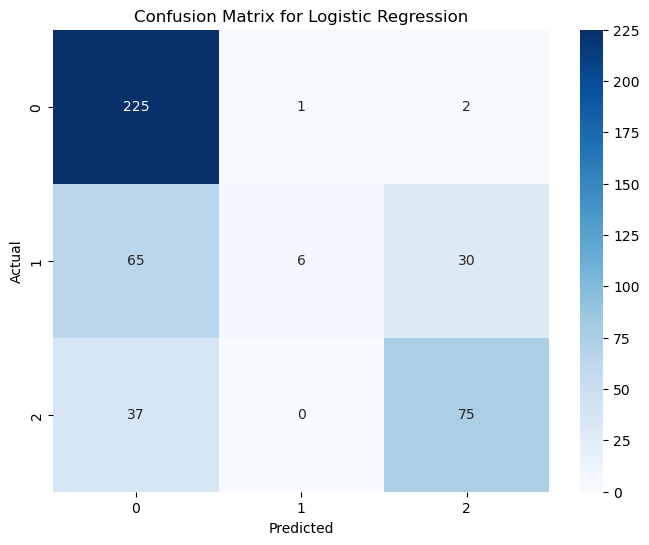

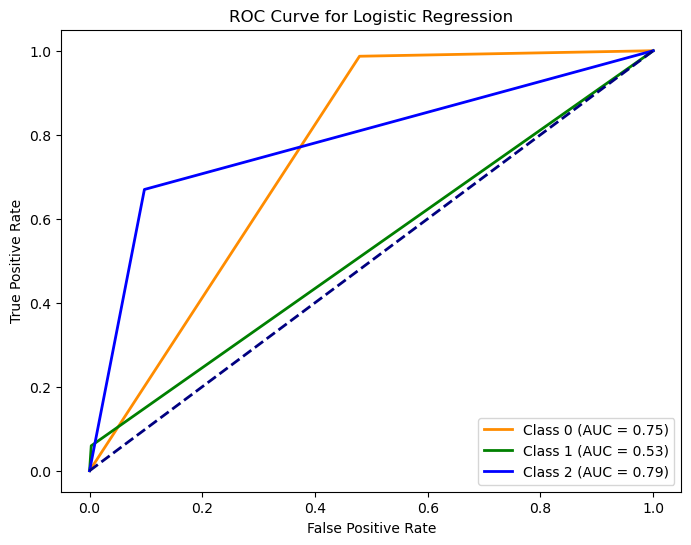

--------------------------------------------------
Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          90       0.46      0.83      0.60       152
         100       0.37      0.23      0.28        75
         115       0.00      0.00      0.00        91
         130       0.64      0.64      0.64       123

    accuracy                           0.50       441
   macro avg       0.37      0.42      0.38       441
weighted avg       0.40      0.50      0.43       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


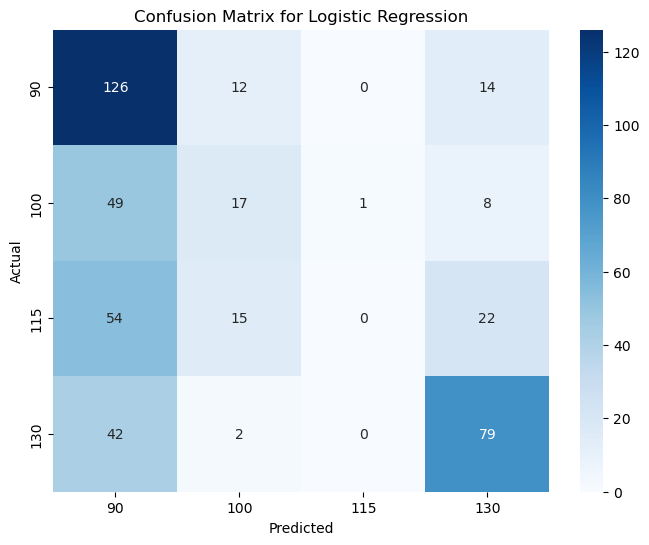

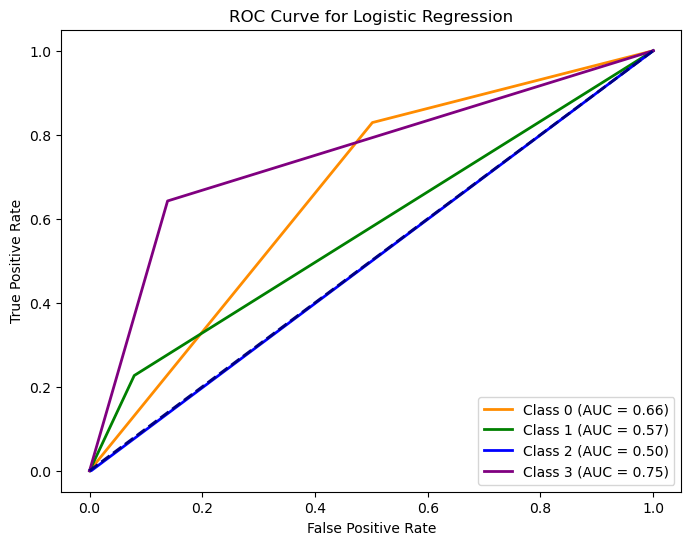

--------------------------------------------------
Evaluating K-Nearest Neighbors for all y values...

Evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



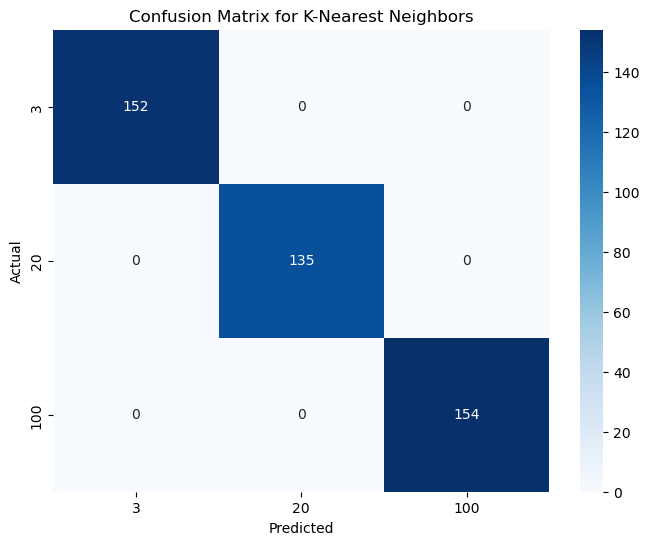

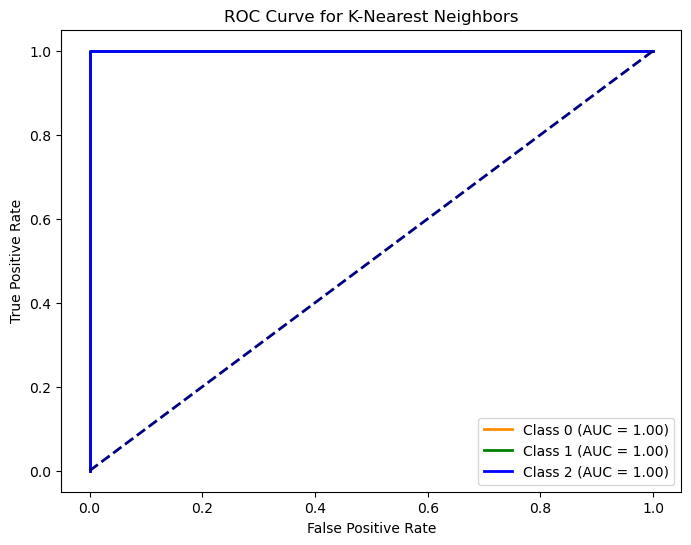

--------------------------------------------------
Evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

          73       0.73      0.78      0.76        88
          80       0.69      0.79      0.74        67
          90       0.80      0.71      0.75        80
         100       0.87      0.84      0.86       206

    accuracy                           0.80       441
   macro avg       0.77      0.78      0.78       441
weighted avg       0.81      0.80      0.80       441



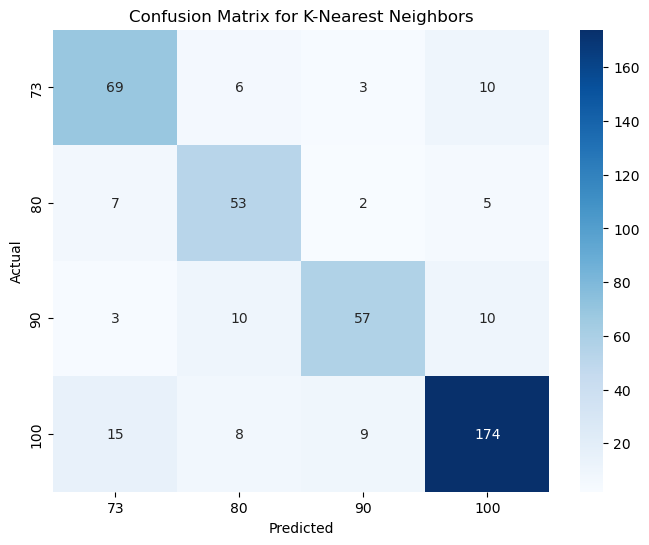

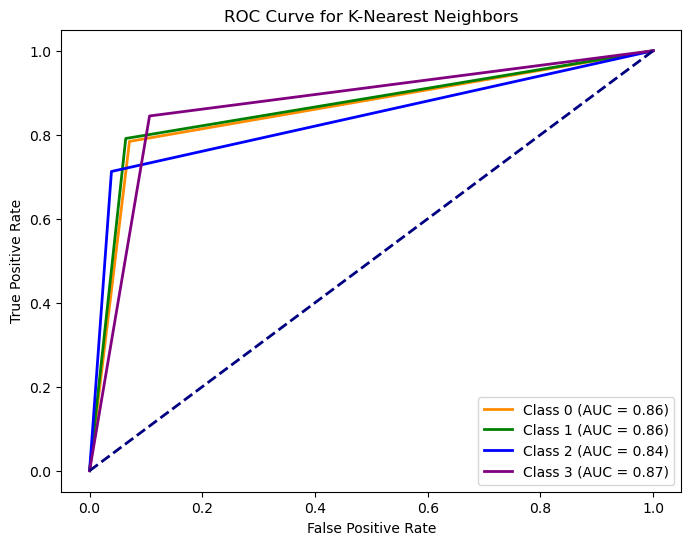

--------------------------------------------------
Evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.94      0.96      0.95       101
           2       0.96      0.95      0.95       112

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



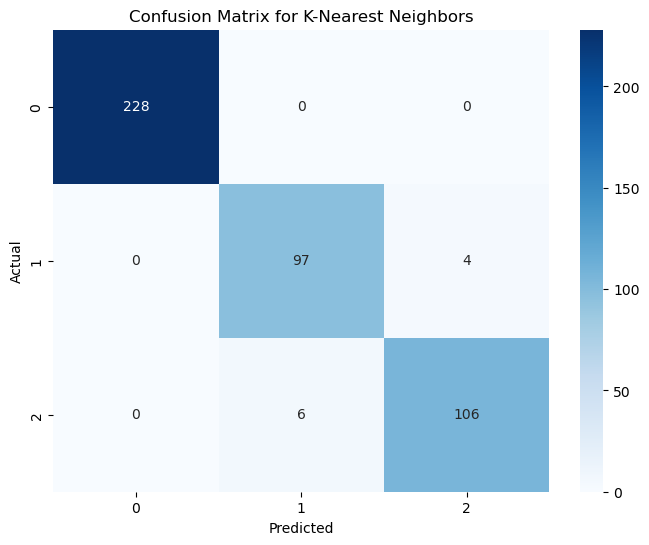

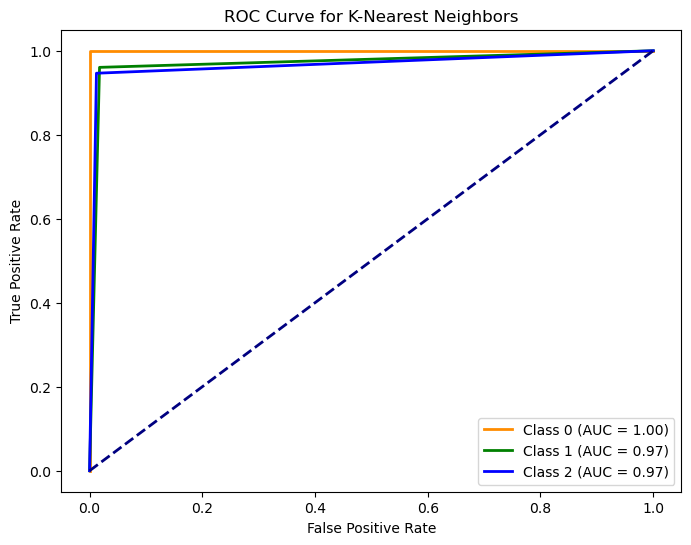

--------------------------------------------------
Evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

          90       0.90      0.93      0.92       152
         100       0.82      0.79      0.80        75
         115       0.91      0.88      0.89        91
         130       0.96      0.97      0.96       123

    accuracy                           0.91       441
   macro avg       0.90      0.89      0.89       441
weighted avg       0.91      0.91      0.91       441



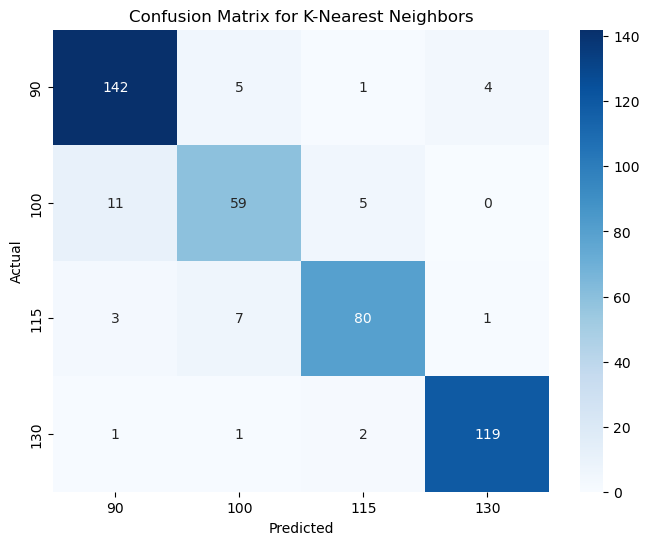

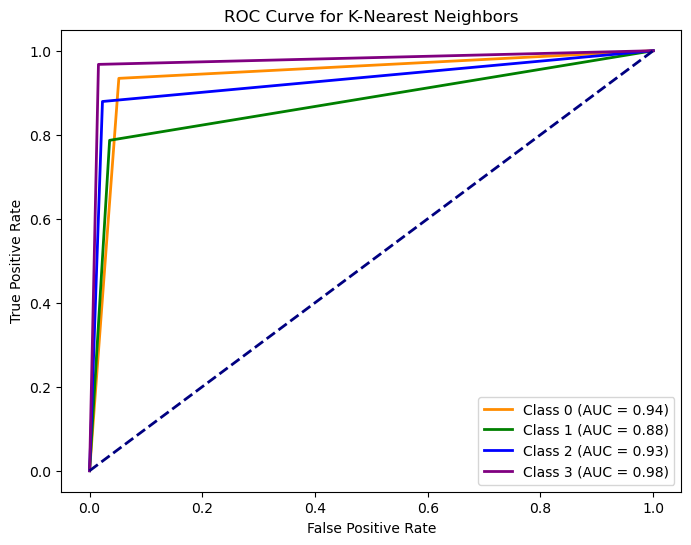

--------------------------------------------------
Evaluating Support Vector Machine for all y values...

Evaluating Support Vector Machine...

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



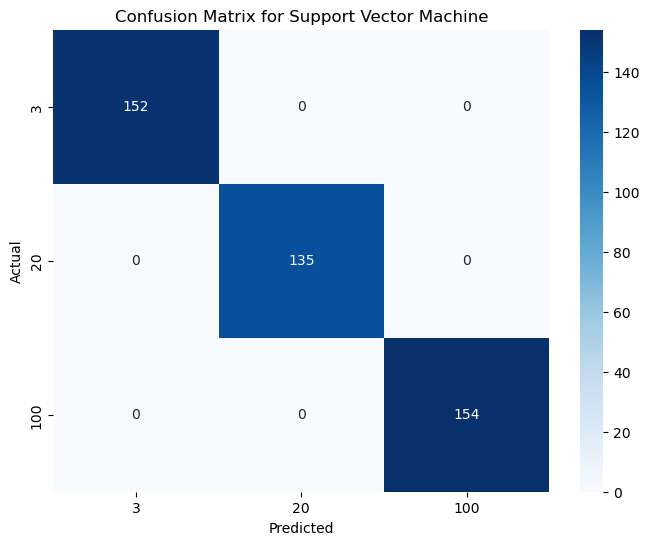

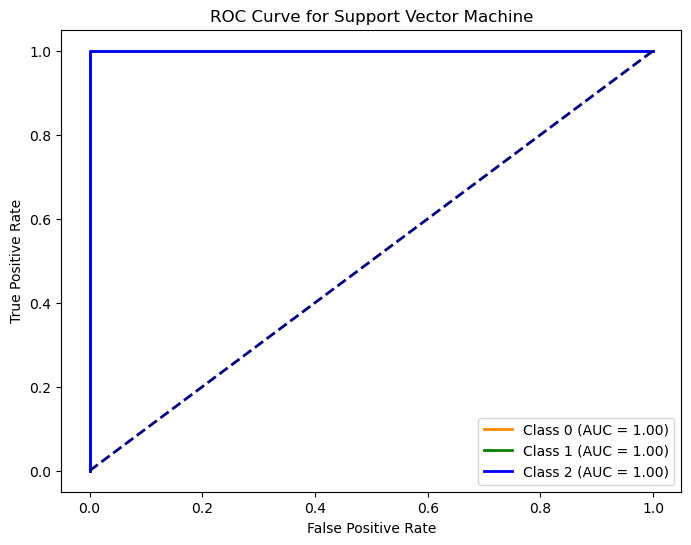

--------------------------------------------------
Evaluating Support Vector Machine...

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

          73       0.00      0.00      0.00        88
          80       0.00      0.00      0.00        67
          90       0.00      0.00      0.00        80
         100       0.47      1.00      0.64       206

    accuracy                           0.47       441
   macro avg       0.12      0.25      0.16       441
weighted avg       0.22      0.47      0.30       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


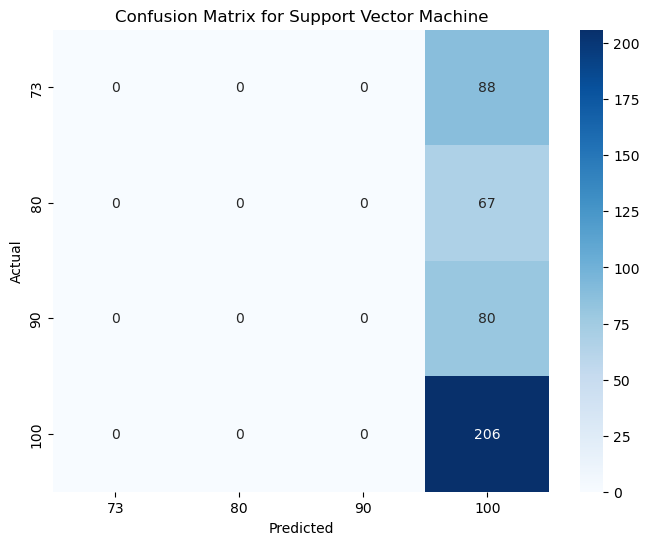

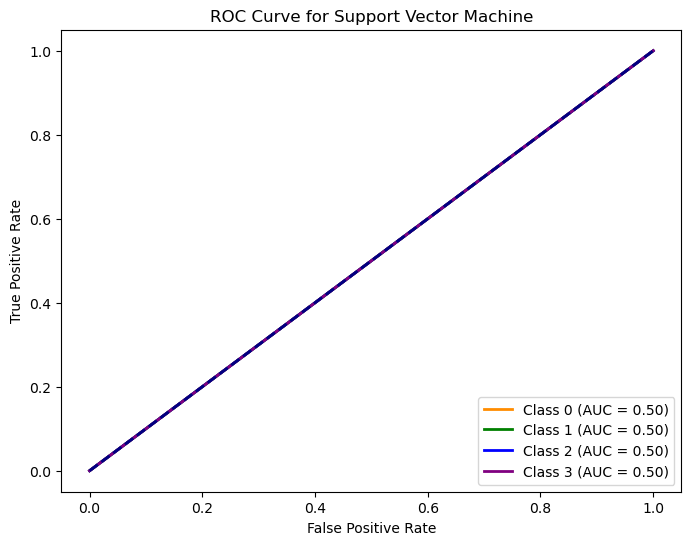

--------------------------------------------------
Evaluating Support Vector Machine...

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       228
           1       0.00      0.00      0.00       101
           2       0.57      0.23      0.33       112

    accuracy                           0.57       441
   macro avg       0.38      0.41      0.35       441
weighted avg       0.44      0.57      0.46       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


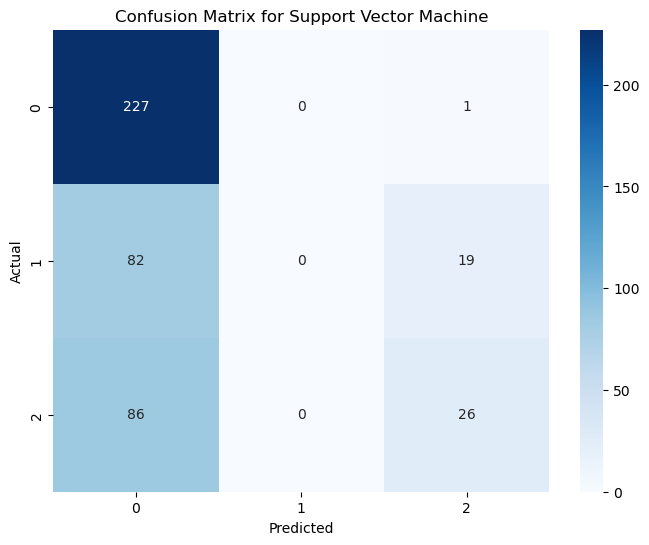

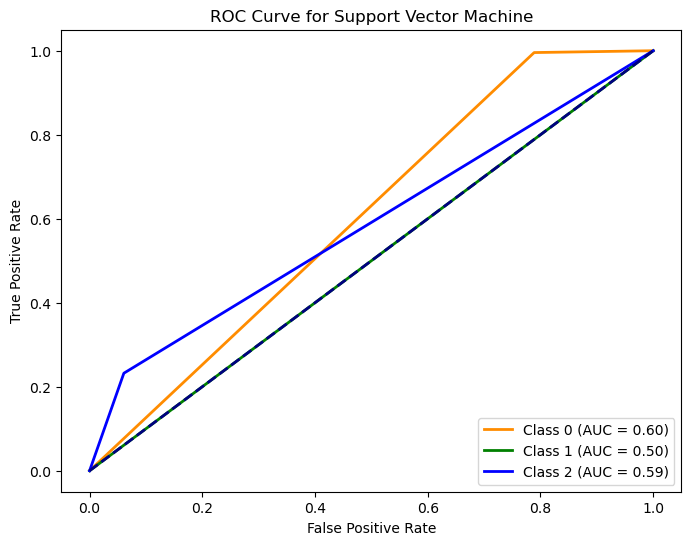

--------------------------------------------------
Evaluating Support Vector Machine...

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

          90       0.42      0.64      0.51       152
         100       0.37      0.23      0.28        75
         115       0.00      0.00      0.00        91
         130       0.60      0.80      0.69       123

    accuracy                           0.48       441
   macro avg       0.35      0.42      0.37       441
weighted avg       0.38      0.48      0.41       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


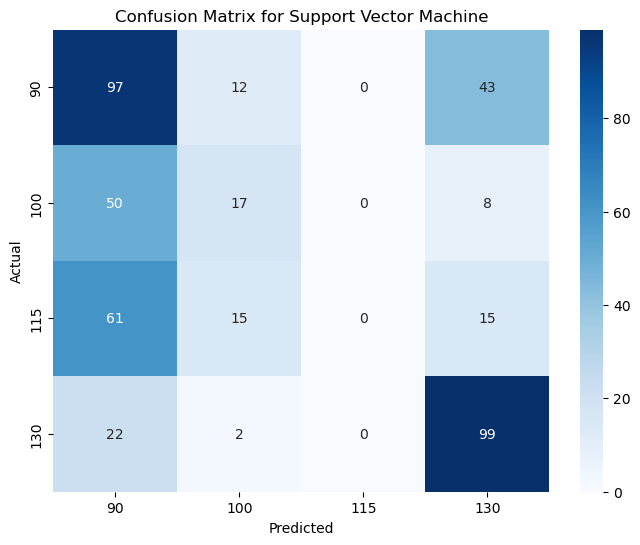

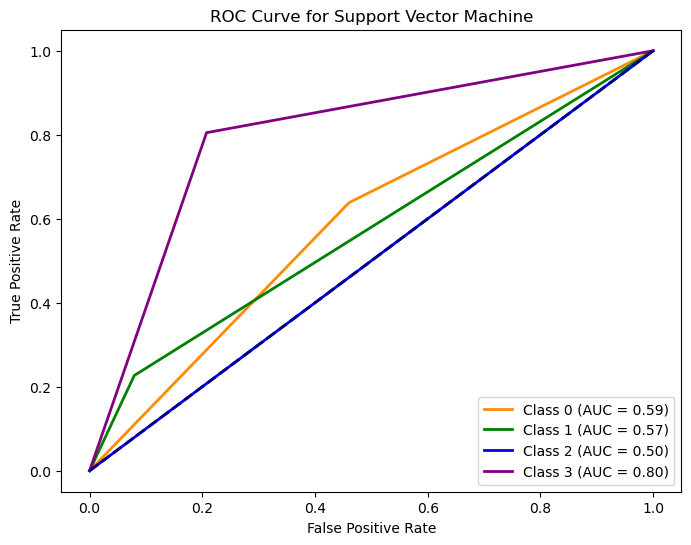

--------------------------------------------------
Evaluating Naive Bayes for all y values...

Evaluating Naive Bayes...

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      0.99      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



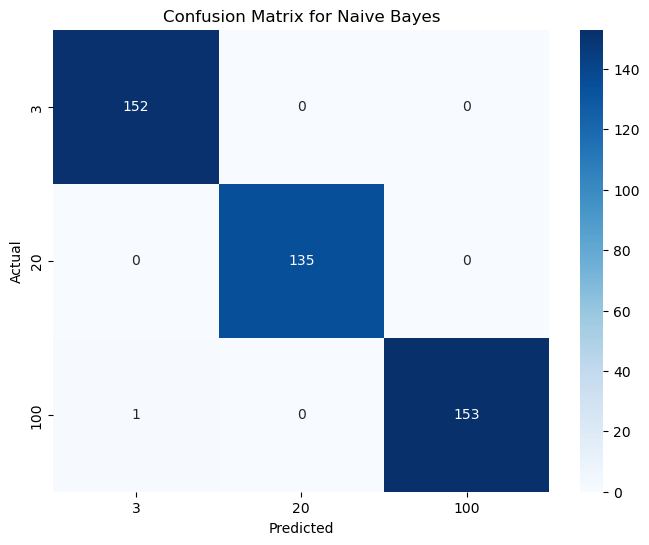

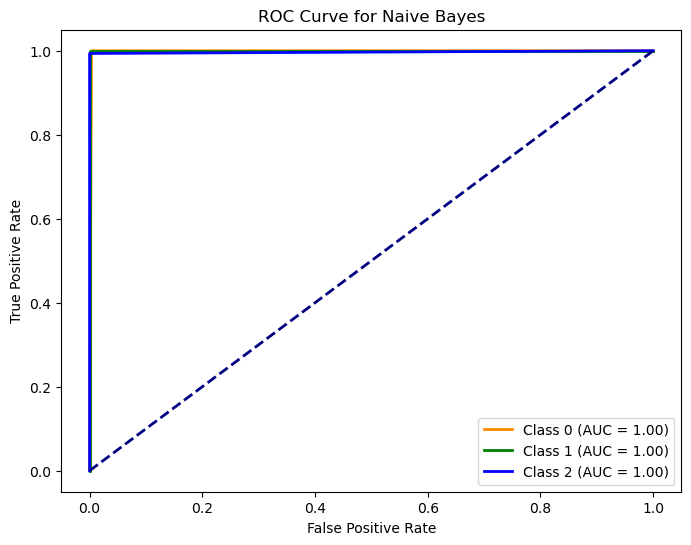

--------------------------------------------------
Evaluating Naive Bayes...

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

          73       0.00      0.00      0.00        88
          80       0.00      0.00      0.00        67
          90       0.26      0.15      0.19        80
         100       0.50      0.95      0.65       206

    accuracy                           0.47       441
   macro avg       0.19      0.28      0.21       441
weighted avg       0.28      0.47      0.34       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


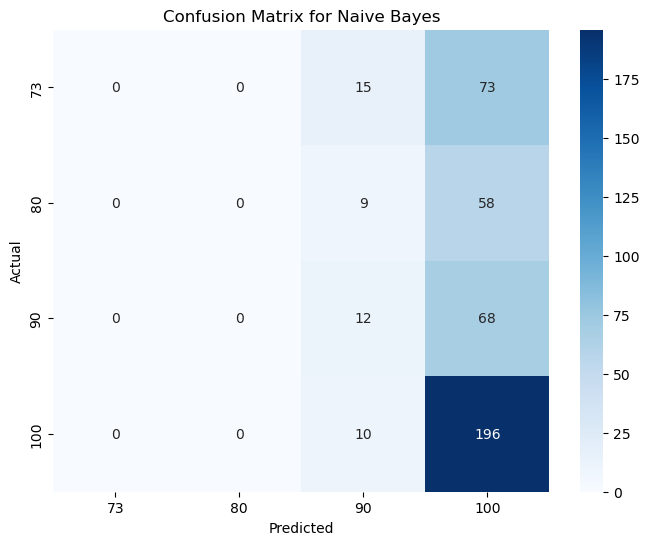

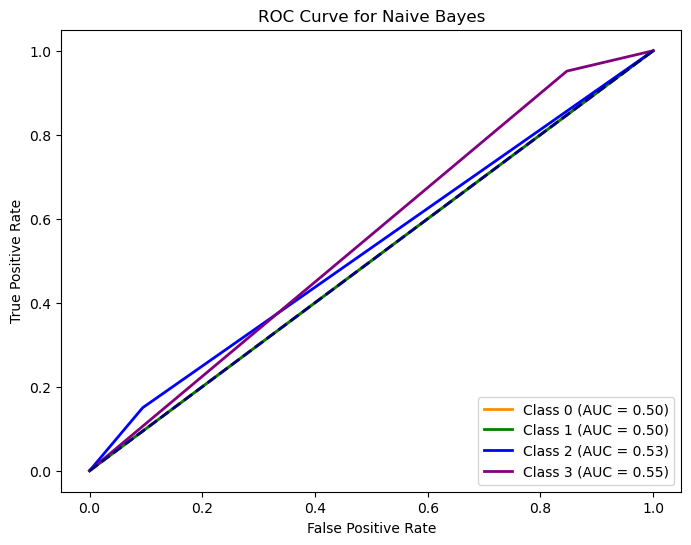

--------------------------------------------------
Evaluating Naive Bayes...

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       228
           1       0.00      0.00      0.00       101
           2       0.57      0.23      0.33       112

    accuracy                           0.57       441
   macro avg       0.38      0.41      0.35       441
weighted avg       0.44      0.57      0.46       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


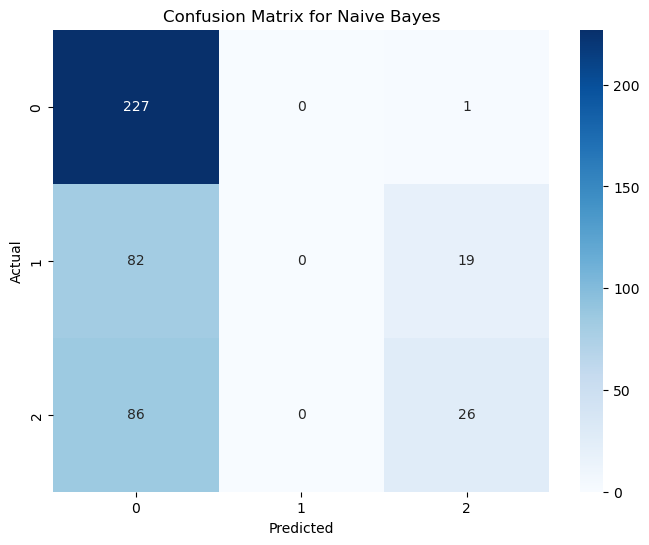

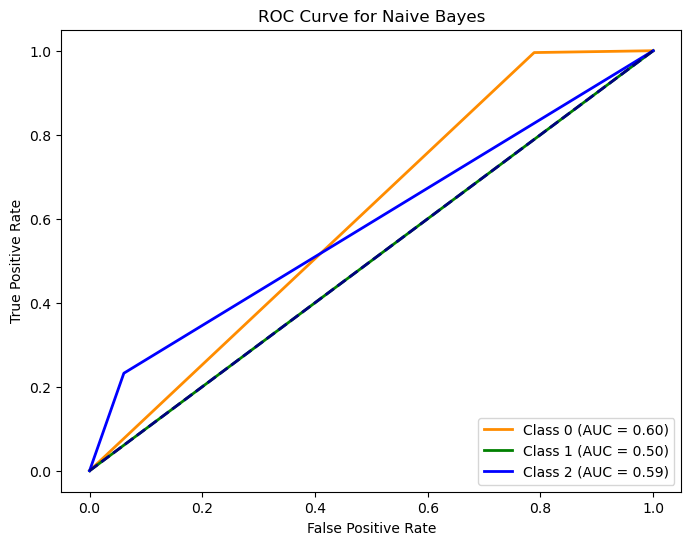

--------------------------------------------------
Evaluating Naive Bayes...

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

          90       0.00      0.00      0.00       152
         100       0.37      0.23      0.28        75
         115       0.00      0.00      0.00        91
         130       0.31      0.98      0.47       123

    accuracy                           0.31       441
   macro avg       0.17      0.30      0.19       441
weighted avg       0.15      0.31      0.18       441



C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


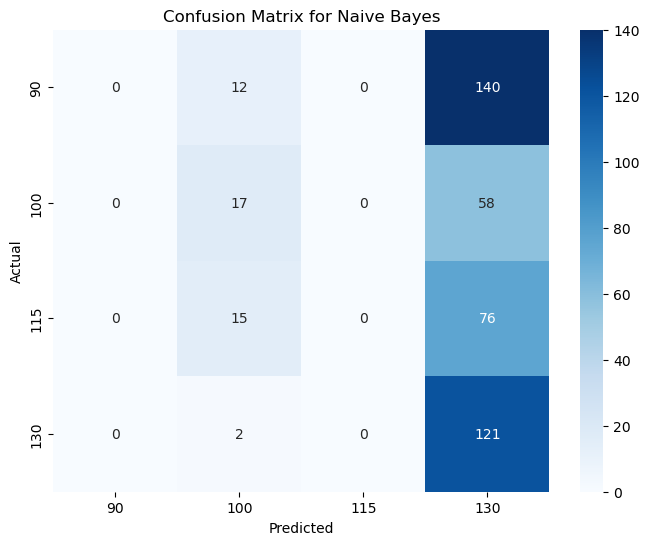

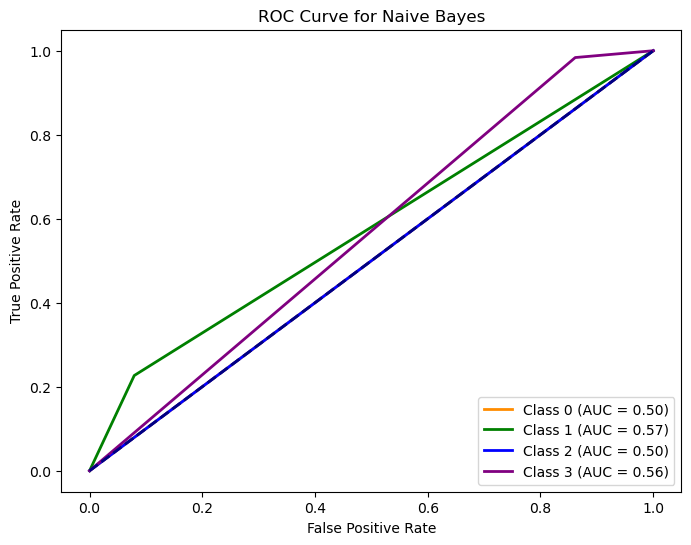

--------------------------------------------------
Evaluating Decision Tree for all y values...

Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



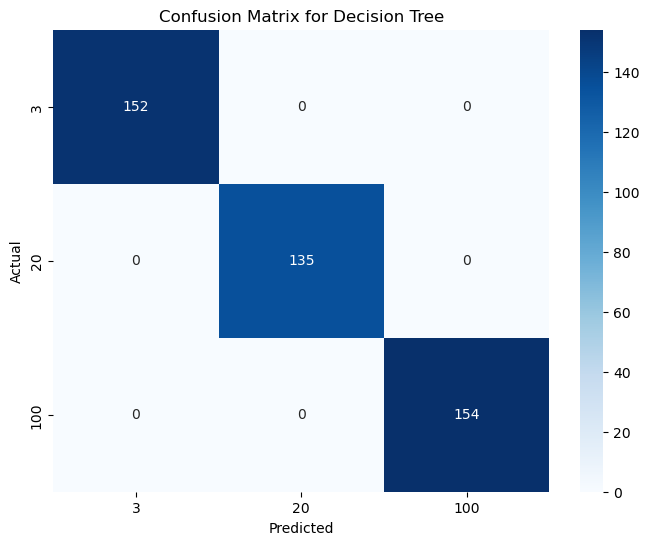

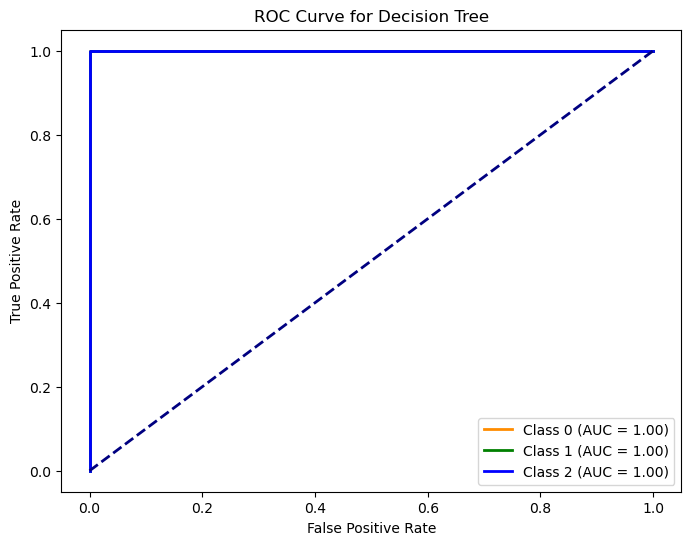

--------------------------------------------------
Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

          73       0.78      0.75      0.76        88
          80       0.68      0.75      0.71        67
          90       0.71      0.64      0.67        80
         100       0.84      0.86      0.85       206

    accuracy                           0.78       441
   macro avg       0.75      0.75      0.75       441
weighted avg       0.78      0.78      0.78       441



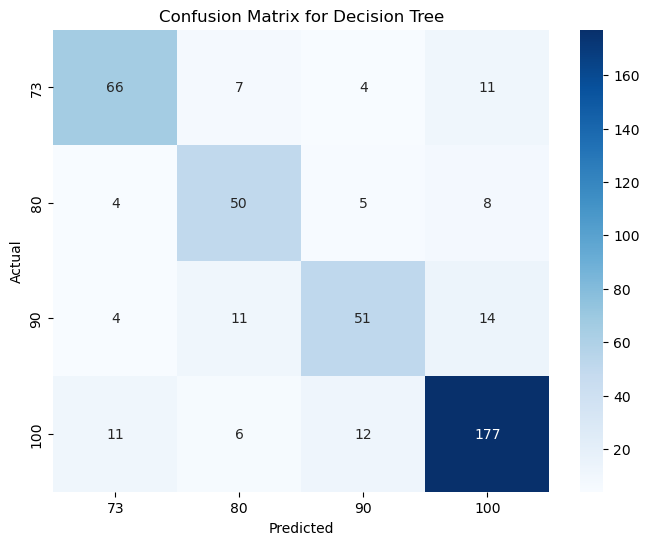

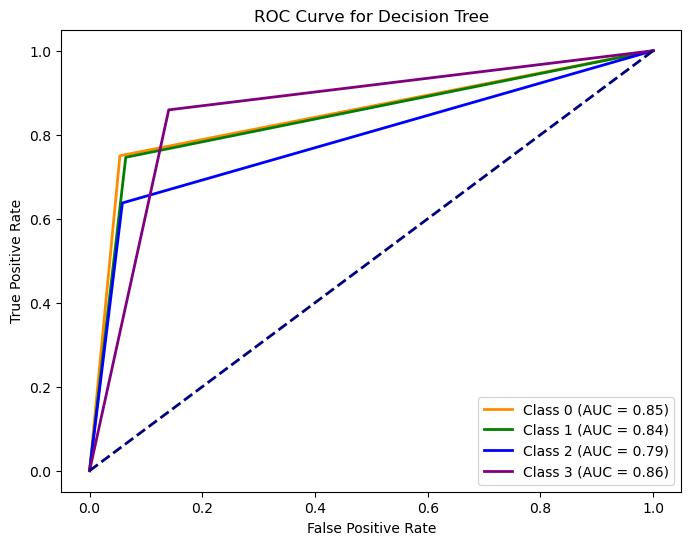

--------------------------------------------------
Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.93      0.94      0.94       101
           2       0.95      0.94      0.94       112

    accuracy                           0.97       441
   macro avg       0.96      0.96      0.96       441
weighted avg       0.97      0.97      0.97       441



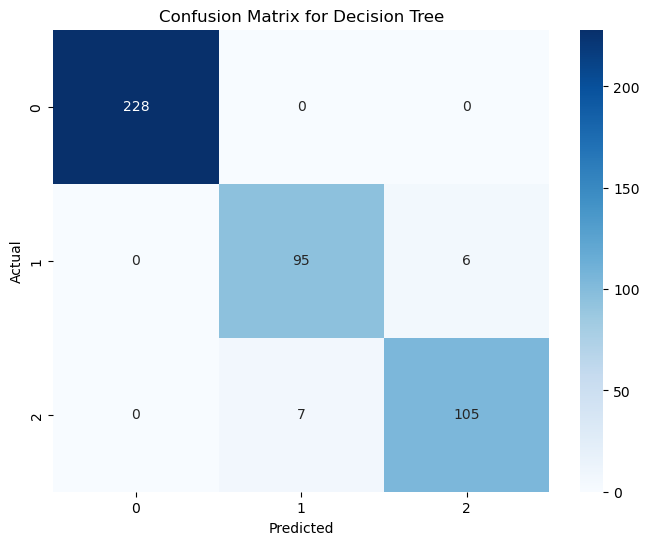

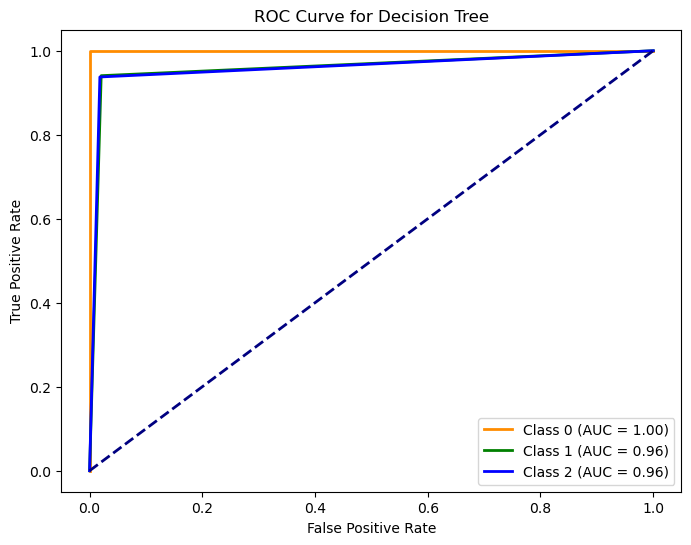

--------------------------------------------------
Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

          90       0.93      0.93      0.93       152
         100       0.84      0.88      0.86        75
         115       0.91      0.85      0.87        91
         130       0.93      0.93      0.93       123

    accuracy                           0.91       441
   macro avg       0.90      0.90      0.90       441
weighted avg       0.91      0.91      0.91       441



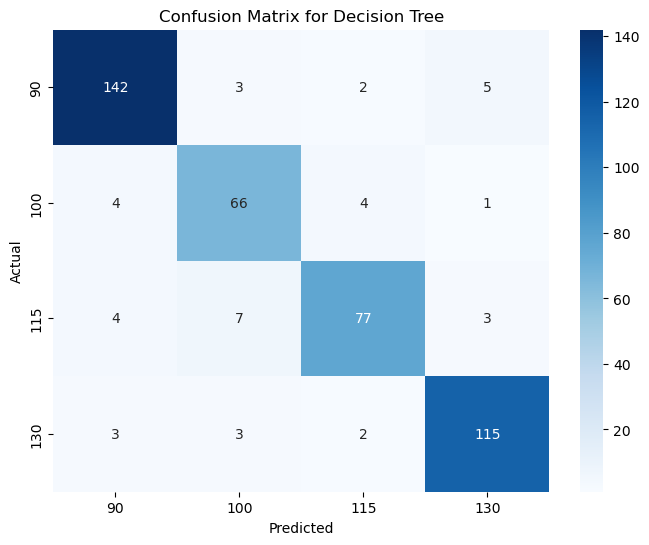

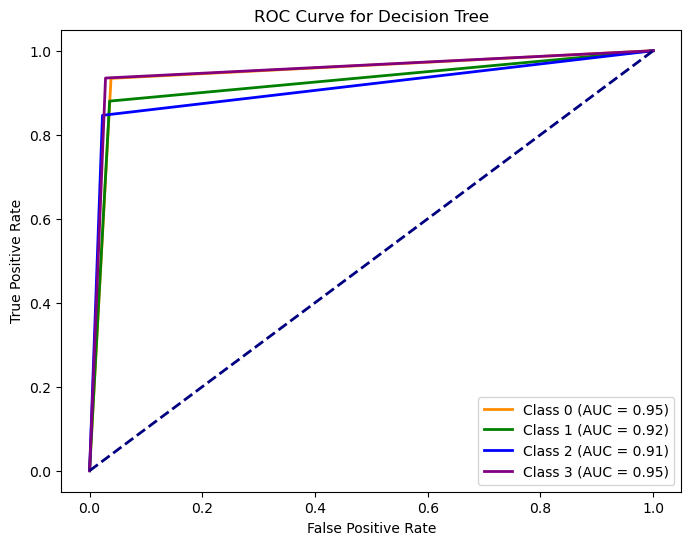

--------------------------------------------------
Evaluating Random Forest for all y values...

Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



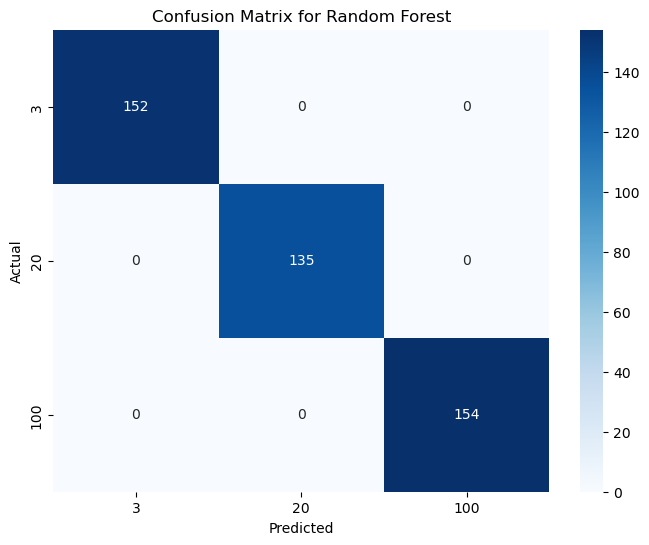

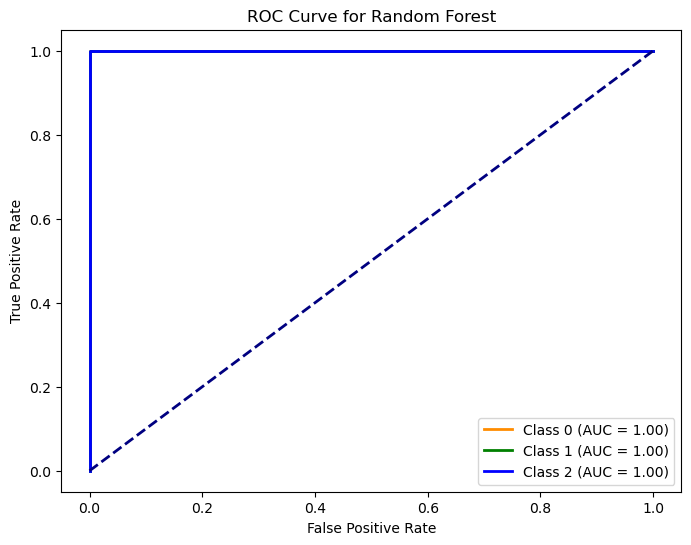

--------------------------------------------------
Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

          73       0.82      0.75      0.79        88
          80       0.72      0.73      0.73        67
          90       0.85      0.69      0.76        80
         100       0.83      0.92      0.87       206

    accuracy                           0.81       441
   macro avg       0.81      0.77      0.79       441
weighted avg       0.81      0.81      0.81       441



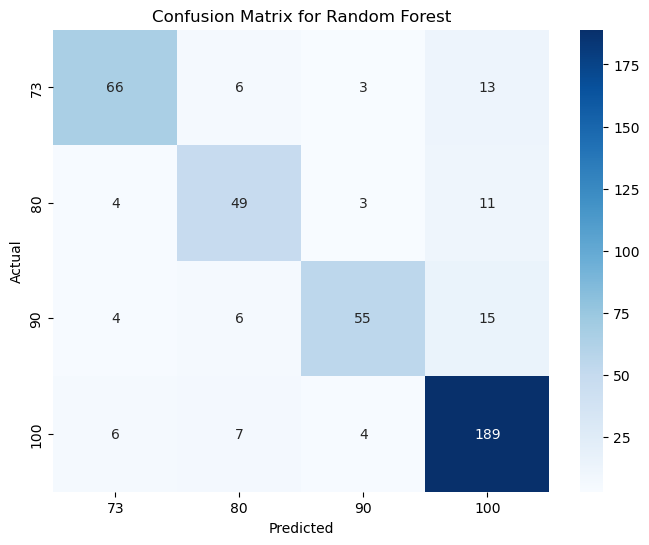

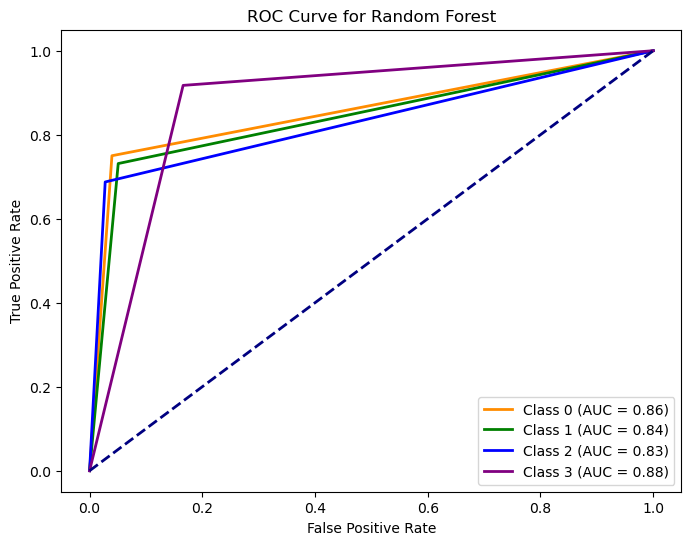

--------------------------------------------------
Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.95      0.96      0.96       101
           2       0.96      0.96      0.96       112

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



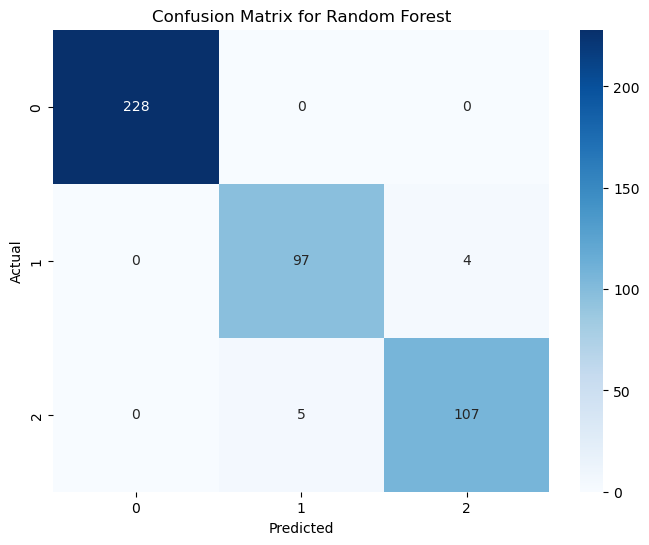

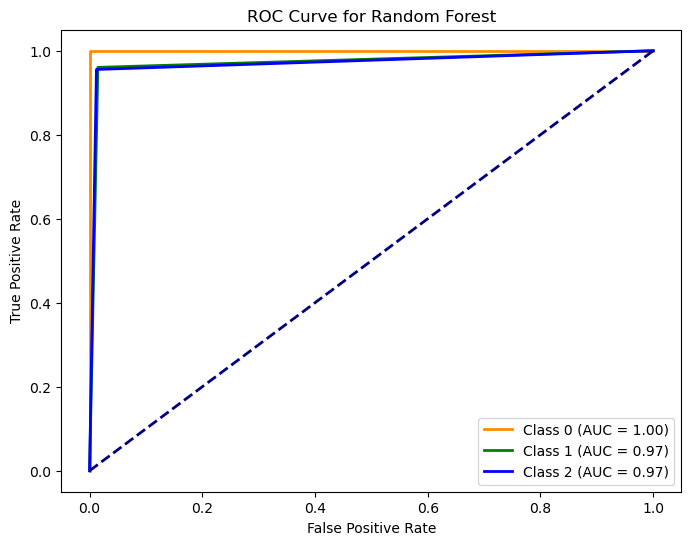

--------------------------------------------------
Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

          90       0.95      0.95      0.95       152
         100       0.92      0.92      0.92        75
         115       1.00      0.95      0.97        91
         130       0.94      0.98      0.96       123

    accuracy                           0.95       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.95      0.95      0.95       441



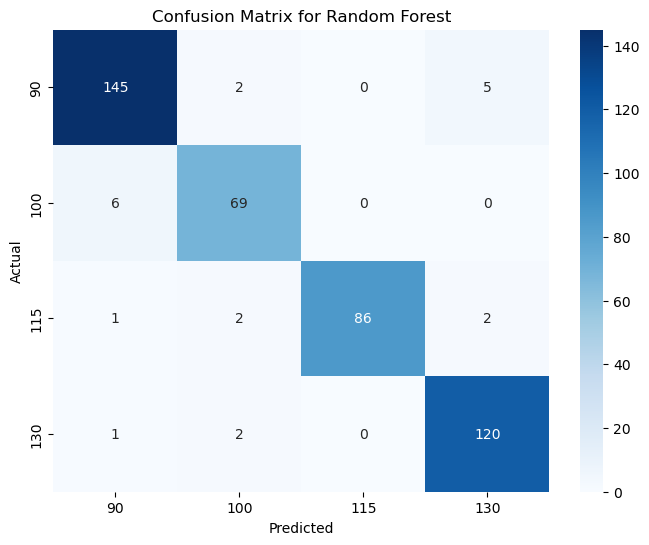

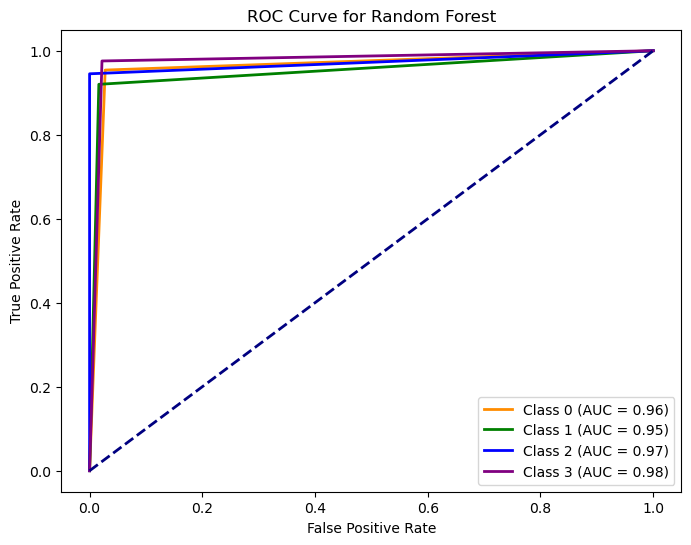

--------------------------------------------------
Evaluating Bagging for all y values...

Evaluating Bagging...

Classification Report for Bagging:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



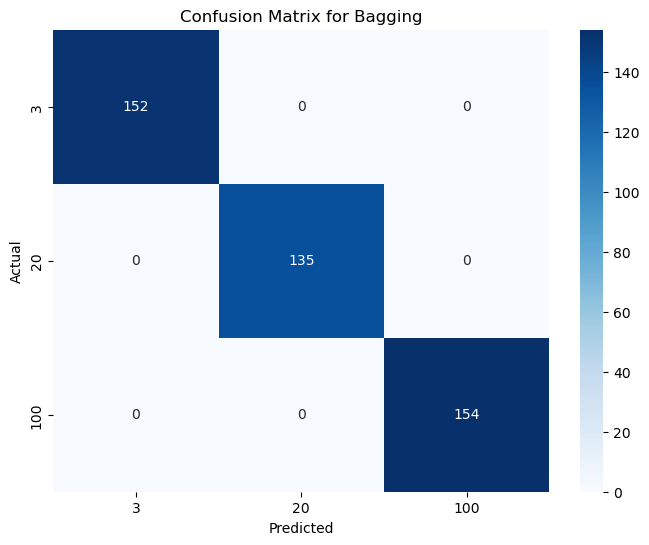

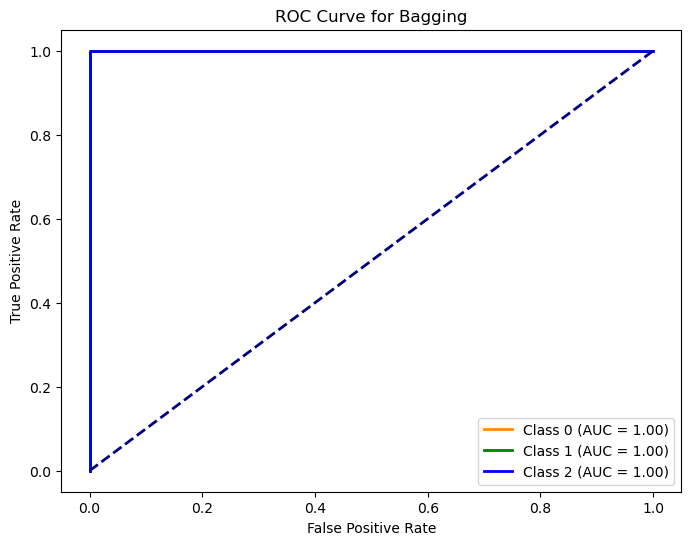

--------------------------------------------------
Evaluating Bagging...

Classification Report for Bagging:

              precision    recall  f1-score   support

          73       0.81      0.82      0.81        88
          80       0.72      0.78      0.75        67
          90       0.77      0.70      0.73        80
         100       0.86      0.87      0.87       206

    accuracy                           0.81       441
   macro avg       0.79      0.79      0.79       441
weighted avg       0.81      0.81      0.81       441



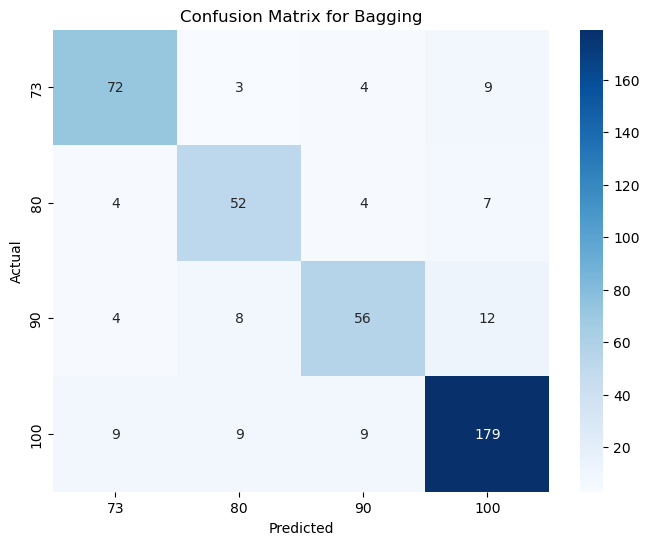

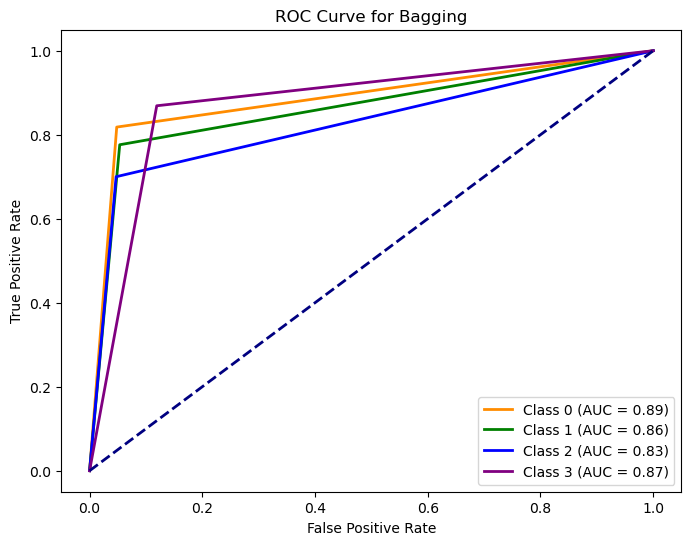

--------------------------------------------------
Evaluating Bagging...

Classification Report for Bagging:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.94      0.96      0.95       101
           2       0.96      0.95      0.95       112

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



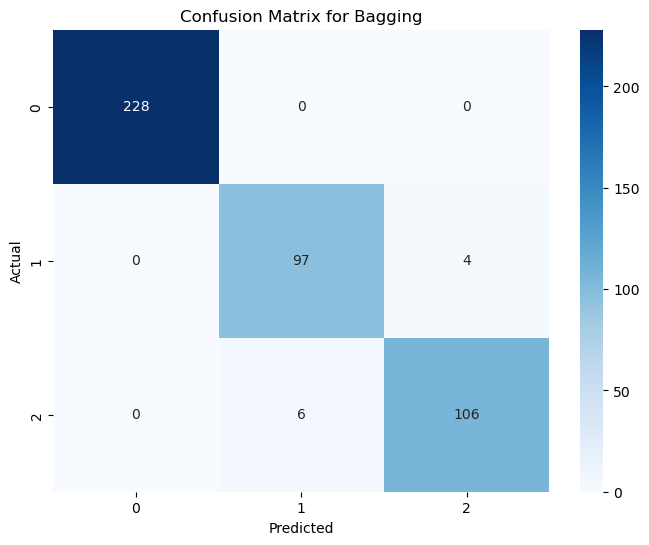

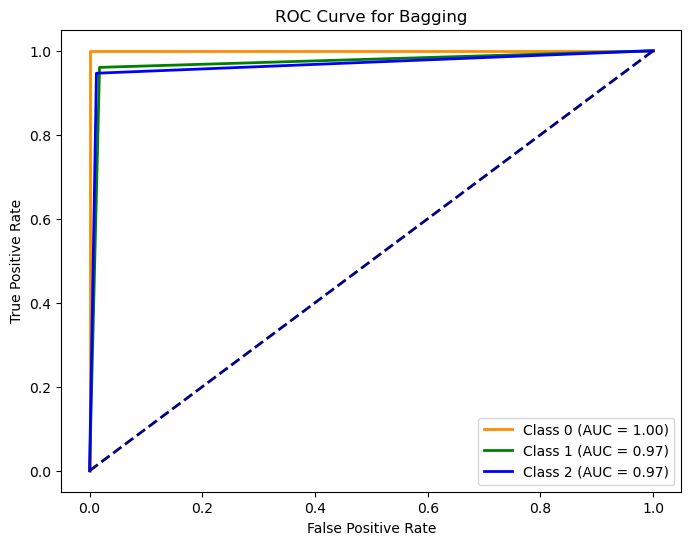

--------------------------------------------------
Evaluating Bagging...

Classification Report for Bagging:

              precision    recall  f1-score   support

          90       0.94      0.95      0.95       152
         100       0.89      0.89      0.89        75
         115       0.97      0.95      0.96        91
         130       0.98      0.98      0.98       123

    accuracy                           0.95       441
   macro avg       0.94      0.94      0.94       441
weighted avg       0.95      0.95      0.95       441



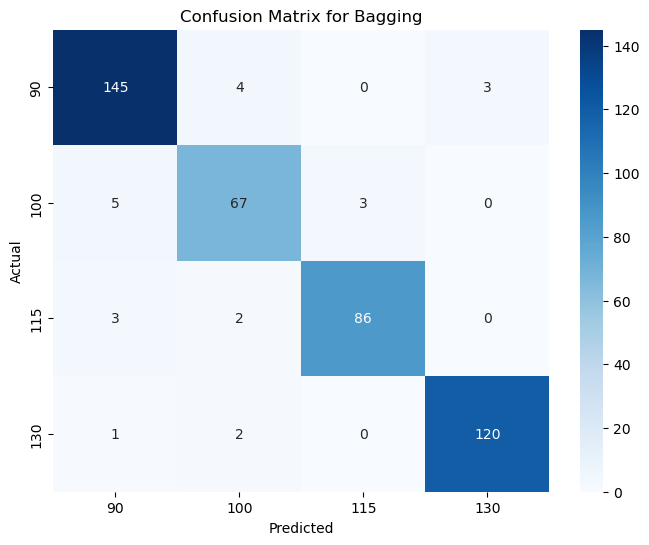

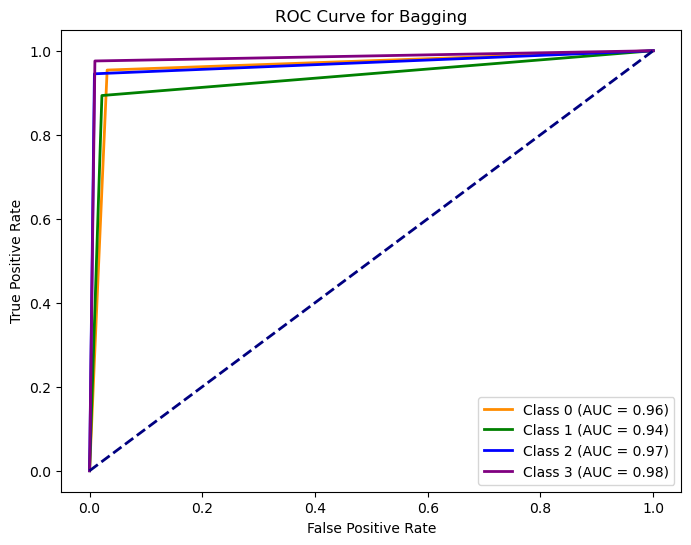

--------------------------------------------------
Evaluating Gradient Boosting for all y values...

Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       152
          20       1.00      1.00      1.00       135
         100       1.00      1.00      1.00       154

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



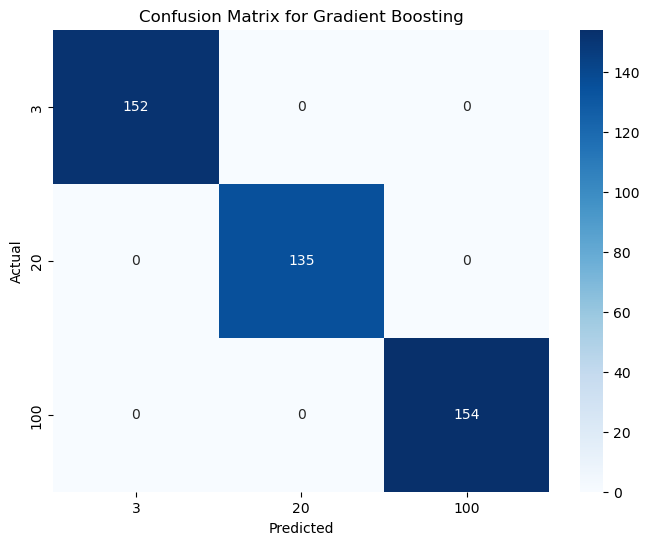

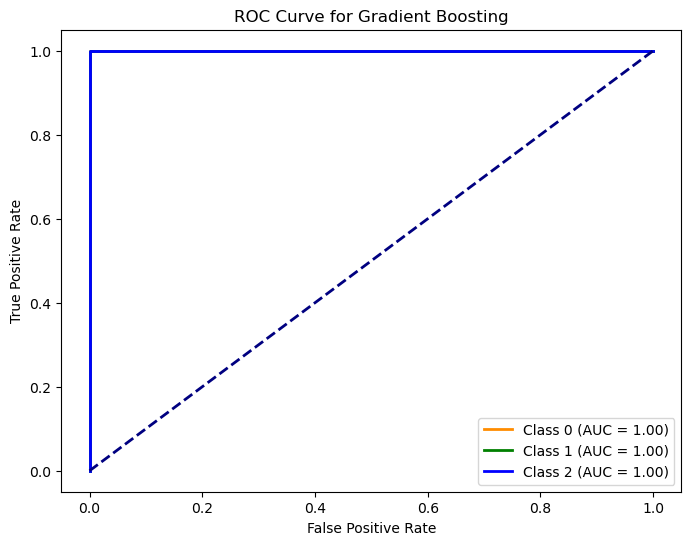

--------------------------------------------------
Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

          73       0.86      0.75      0.80        88
          80       0.75      0.57      0.64        67
          90       0.69      0.51      0.59        80
         100       0.75      0.92      0.83       206

    accuracy                           0.76       441
   macro avg       0.76      0.69      0.72       441
weighted avg       0.76      0.76      0.75       441



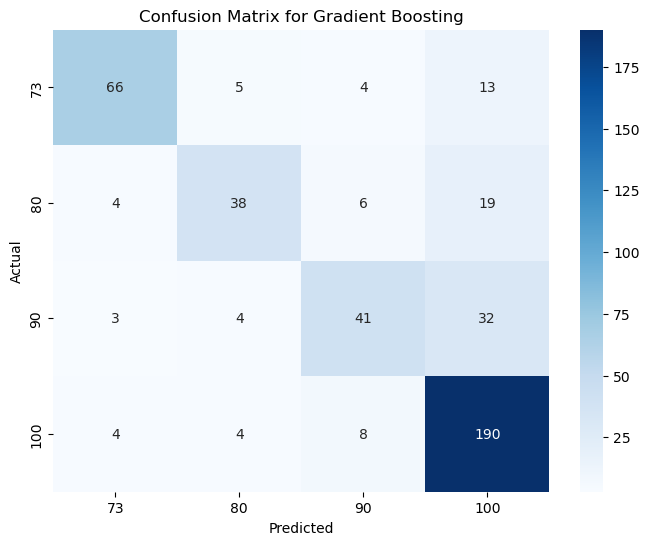

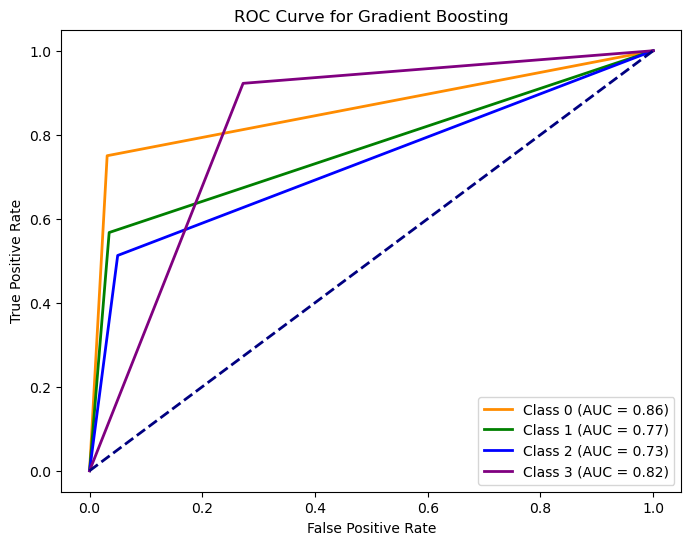

--------------------------------------------------
Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.94      0.95      0.95       101
           2       0.96      0.96      0.96       112

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



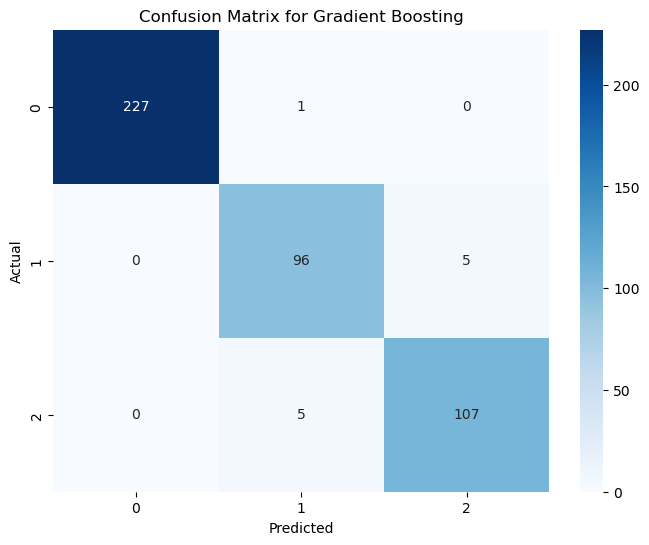

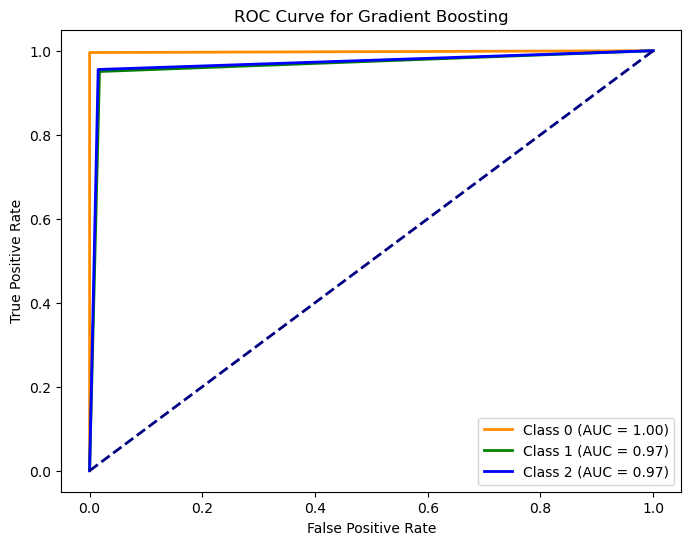

--------------------------------------------------
Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

          90       0.97      0.93      0.95       152
         100       0.83      0.93      0.88        75
         115       0.91      0.90      0.91        91
         130       0.97      0.95      0.96       123

    accuracy                           0.93       441
   macro avg       0.92      0.93      0.92       441
weighted avg       0.93      0.93      0.93       441



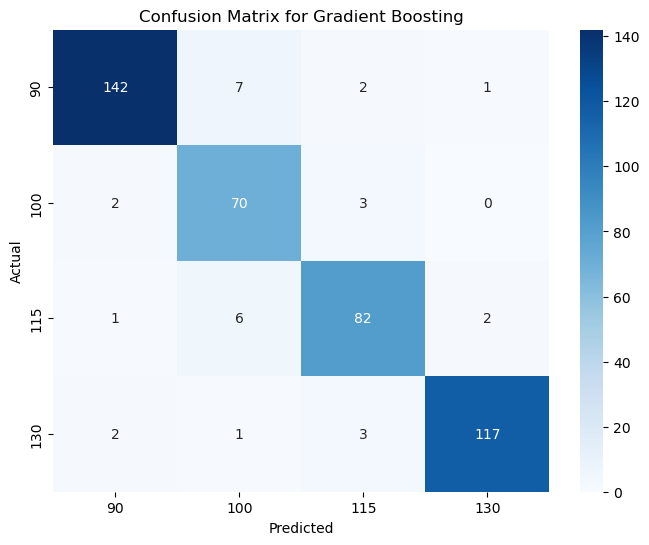

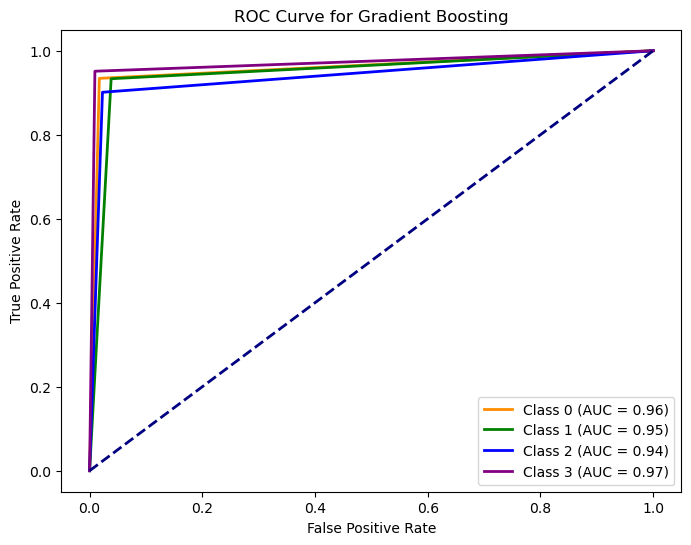

--------------------------------------------------


In [82]:
# Loop through classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Loop through classifiers and y values
for classifier_name, classifier in classifiers.items():
    print(f"Evaluating {classifier_name} for all y values...\n")

    for column in y.columns:
        features = {
            'y_coolerCondition': ['CE', 'CP', 'PS4', 'PS5', 'TS1', 'TS2', 'TS3', 'TS4'],
            'y_valveCondition': ['PS2', 'PS3'],
            'y_pumpLeak': ['FS1', 'SE', 'PS1'],
            'y_hydraulicAcc': ['PS1', 'PS2', 'PS3', 'SE', 'FS1', 'TS2']
        }

        X_train_classifier = X_train[features[column]]
        X_test_classifier = X_test[features[column]]

        # Train the classifier on the specific y value
        classifier.fit(X_train_classifier, y_train[column])

        # Make predictions
        y_pred = classifier.predict(X_test_classifier)

        # Evaluate and display results using the updated function
        evaluate_classifier(y_test[column], y_pred, classifier_name)

In [83]:
def predict_manually(input_values, classifier_dict, features_dict, X_train, y_train):
    predictions = {}

    for target_variable, features in features_dict.items():
        # Select the appropriate classifier for the target variable
        classifier = classifier_dict[target_variable]

        # Extract features for the target variable from the input_values
        input_data = {feature: input_values[feature] for feature in features}

        # Train the classifier on the specific target variable
        X_train_classifier = X_train[features]
        y_train_classifier = y_train[target_variable]
        classifier.fit(X_train_classifier, y_train_classifier)

        # Make predictions
        prediction = classifier.predict([list(input_data.values())])[0]
        predictions[target_variable] = prediction

    return predictions

# Loop through classifiers and y values
manual_predictions = {}

# Create an empty DataFrame to store the manual input and output
manual_input_output = pd.DataFrame()

for target_variable, features_list in features.items():
    for classifier_name, classifier in classifiers.items():
        if target_variable not in manual_predictions:
            manual_predictions[target_variable] = {}

        # Use the function to predict results for each classifier
        predictions = predict_manually(manual_input_values, {target_variable: classifier}, {target_variable: features_list}, X_train, y_train)

        # Ensure the target_variable key exists in manual_predictions
        if target_variable not in manual_predictions:
            manual_predictions[target_variable] = {}

        manual_predictions[target_variable][classifier_name] = predictions.get(target_variable, None)

        # Append the results to the manual_input_output DataFrame
        manual_input_output = manual_input_output.append({
            'Target_Variable': target_variable,
            'Classifier': classifier_name,
            'Manual_Input': manual_input_values,
            'Prediction': predictions.get(target_variable, None)
        }, ignore_index=True)

        # Display predictions for each classifier and target variable
#         print(f"{target_variable} - {classifier_name}: {predictions.get(target_variable, None)}")
#     print("-" * 50)

# Display the manual_input_output DataFrame
# print("\nManual Input and Output DataFrame:")
# print(manual_input_output)
manual_input_output

C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ajayk\AppData\Local\Temp\ipykernel_18544\1132329384.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  manual_input_output = manual_input_output.append({
C:\Users\ajayk\anaconda3\Lib\site-packages\sklea

C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\ajayk\AppData\Local\Temp\ipykernel_18544\1132329384.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  manual_input_output = manual_input_output.append({
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\ajayk\AppData\Local\Temp\ipykernel_18544\1132329384.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  manual_input_output = manual_input_output.append({
C:\Users\ajayk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fi

,Target_Variable,Classifier,Manual_Input,Prediction
0,y_coolerCondition,Logistic Regression,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
1,y_coolerCondition,K-Nearest Neighbors,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
2,y_coolerCondition,Support Vector Machine,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
3,y_coolerCondition,Naive Bayes,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
4,y_coolerCondition,Decision Tree,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
5,y_coolerCondition,Random Forest,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
6,y_coolerCondition,Bagging,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
7,y_coolerCondition,Gradient Boosting,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",3
8,y_valveCondition,Logistic Regression,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",100
9,y_valveCondition,K-Nearest Neighbors,"{'CE': 0.5, 'CP': 0.6, 'PS4': 120, 'PS5': 110,...",90
